# Loan Application Status Prediction

# 1. Dataset loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# 2.Checking basic details

In [5]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.shape

(614, 12)

In [9]:
print(df.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Replacing null values with mean and mode values

In [10]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
#Filling Null Values
df['Dependents'].fillna(value=df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(value=df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(value=df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(value=df['Self_Employed'].mode()[0],inplace=True)

In [11]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# 3.EDA

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

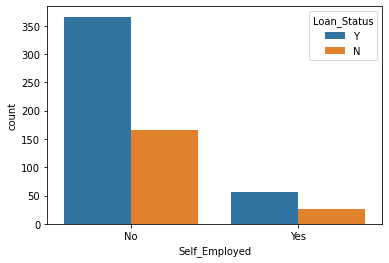

In [12]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

most of the data we have from not employed person Here we see if the person is not self employed there is high chances of approval

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

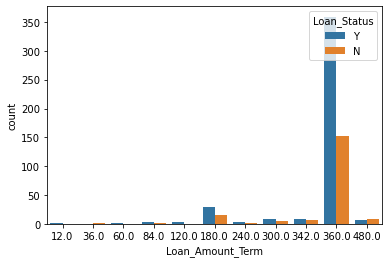

In [13]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

Most of the people who applied for loan asked for 360 months of term more half are getting approved People those are taking loan for 480 months, most of them are getting approval

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

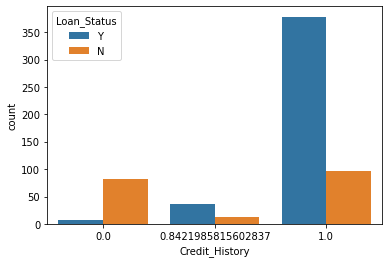

In [14]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

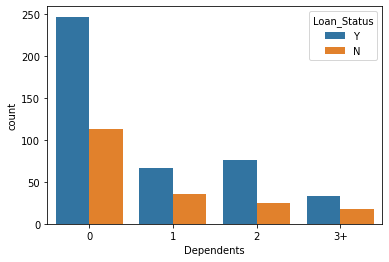

In [15]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

We can notice people those are not having dependents are getting chances of Loan approval

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

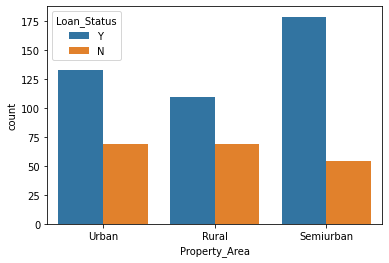

In [16]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

Those people are in semiurban area high chance of getting loan

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

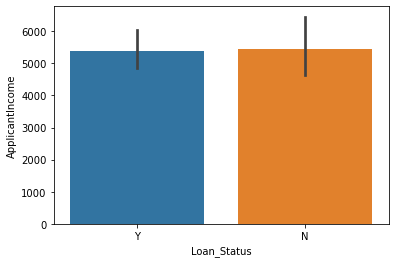

In [17]:
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

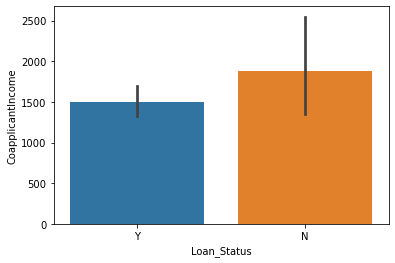

In [18]:
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)

<AxesSubplot:>

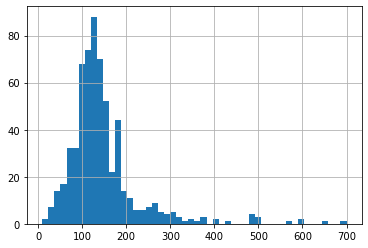

In [19]:
df['LoanAmount'].hist(bins=50)

### correlation

In [20]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.172914,-0.045364,0.000525,0.005853,-0.172693,0.030239,-0.031319,0.031121,0.082045,0.017987
Married,-0.364569,1.000000,0.334216,0.012304,0.004489,-0.003163,0.233224,0.003281,0.028283,0.031057,0.003071,-0.091478
Dependents,-0.172914,0.334216,1.000000,0.055752,0.056798,0.079403,-0.007295,0.053924,0.056024,0.000862,0.001781,-0.010118
Education,-0.045364,0.012304,0.055752,1.000000,-0.010383,0.073543,0.084689,-0.072995,0.078645,0.069148,-0.003592,0.085884
Self_Employed,0.000525,0.004489,0.056798,-0.010383,1.000000,0.005906,-0.080509,-0.008925,0.008366,0.005927,0.021996,0.003700
ApplicantIncome,0.005853,-0.003163,0.079403,0.073543,0.005906,1.000000,0.378095,0.365594,-0.013189,0.036718,0.078590,-0.018675
CoapplicantIncome,-0.172693,0.233224,-0.007295,0.084689,-0.080509,0.378095,1.000000,0.203701,0.060137,0.051218,0.018346,-0.084419
LoanAmount,0.030239,0.003281,0.053924,-0.072995,-0.008925,0.365594,0.203701,1.000000,0.020456,0.045040,0.114591,0.040160
Loan_Amount_Term,-0.031319,0.028283,0.056024,0.078645,0.008366,-0.013189,0.060137,0.020456,1.000000,0.075963,-0.066941,0.085191
Credit_History,0.031121,0.031057,0.000862,0.069148,0.005927,0.036718,0.051218,0.045040,0.075963,1.000000,-0.058622,0.280181


<AxesSubplot:>

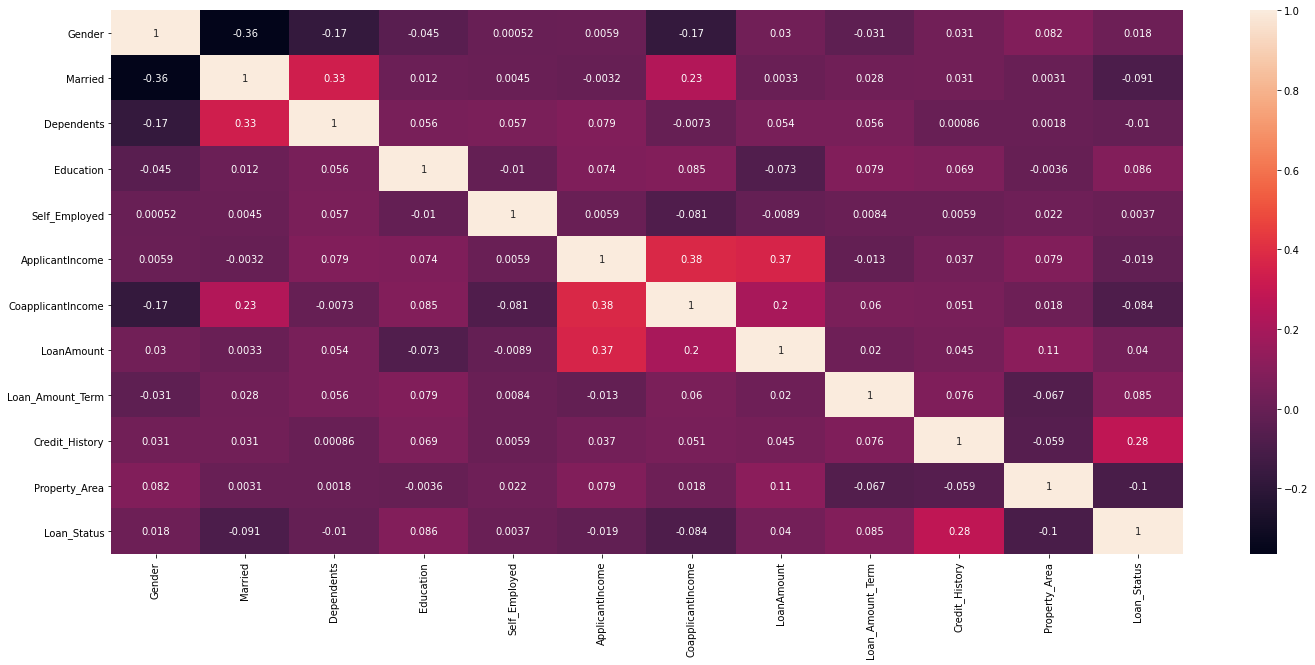

In [21]:
plt.figure(figsize=[24,10])
sns.heatmap(df_corr,annot=True)

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

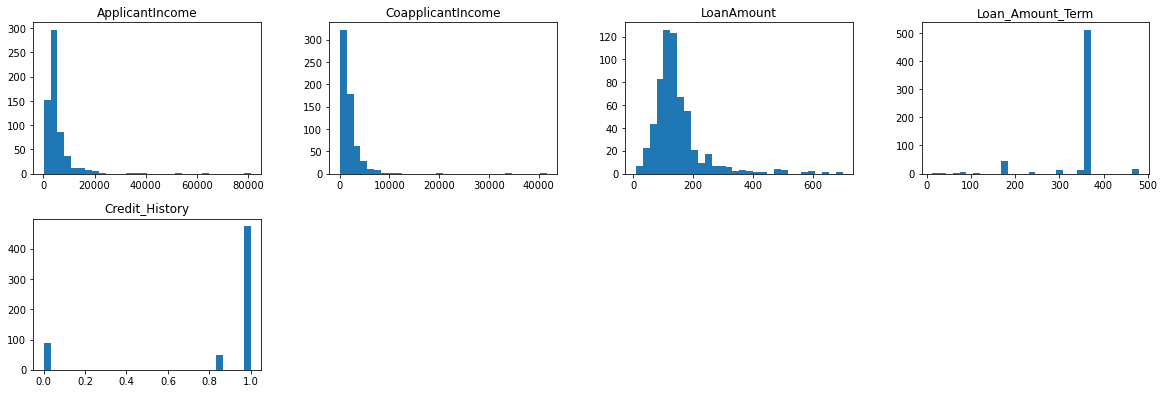

In [22]:
df.hist(figsize=(20,10), grid=False, layout=(3, 4), bins = 30)

# 4. Data pre-processing

### Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Education']=LE.fit_transform(df['Education'])
df['Gender']=LE.fit_transform(df['Gender'])
df['Married']=LE.fit_transform(df['Married'])
df['Dependents']=LE.fit_transform(df['Dependents'])
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])
df['Property_Area']=LE.fit_transform(df['Property_Area'])
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])

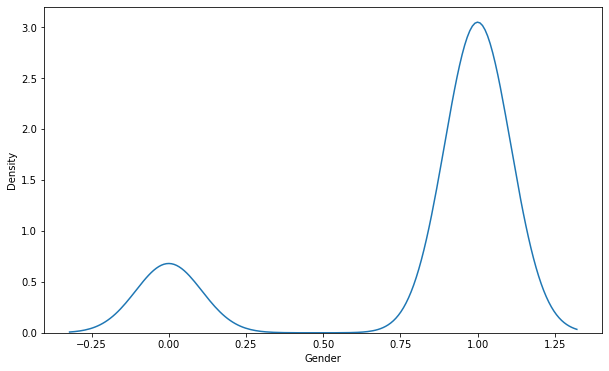

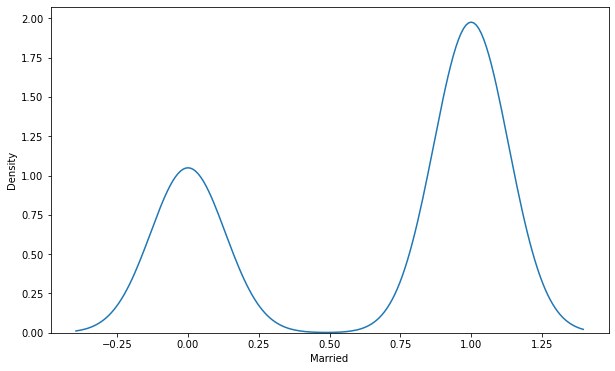

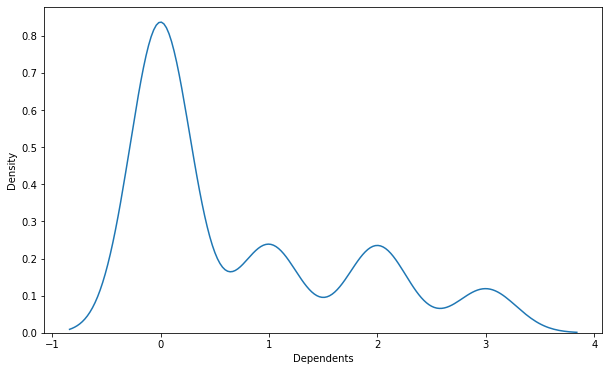

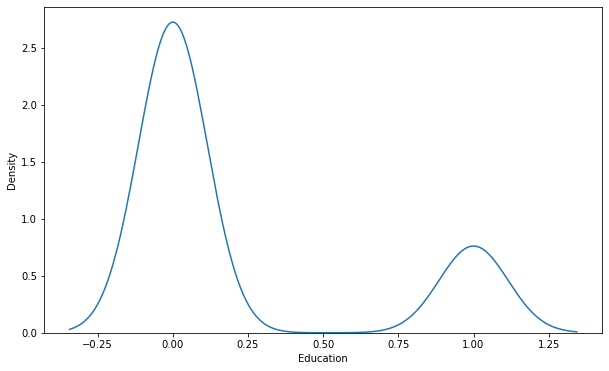

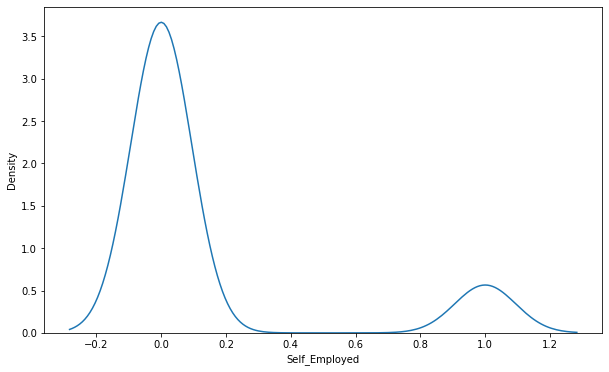

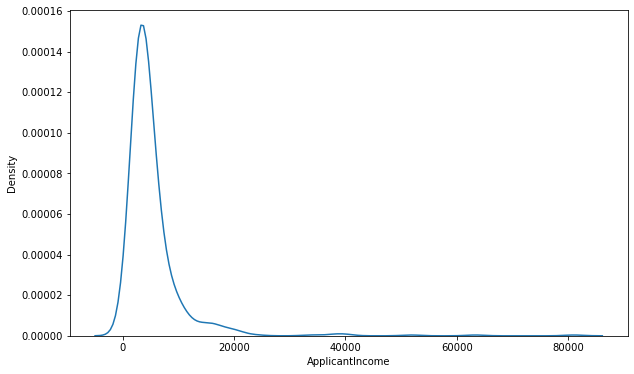

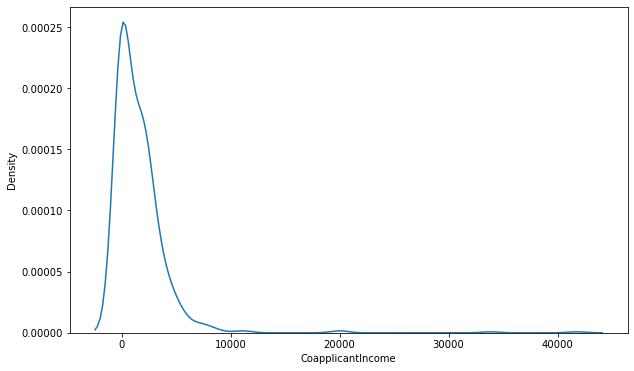

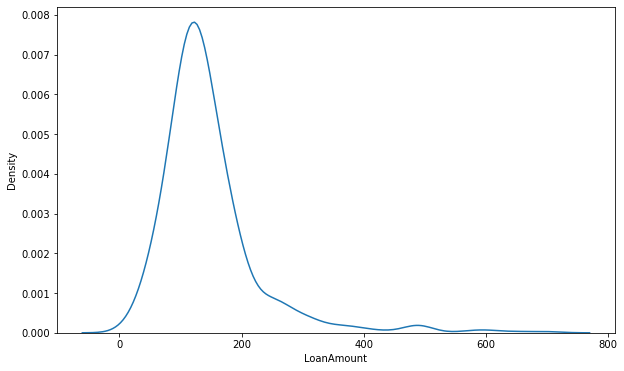

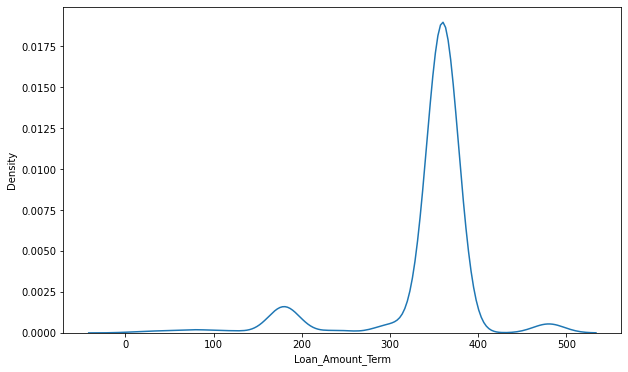

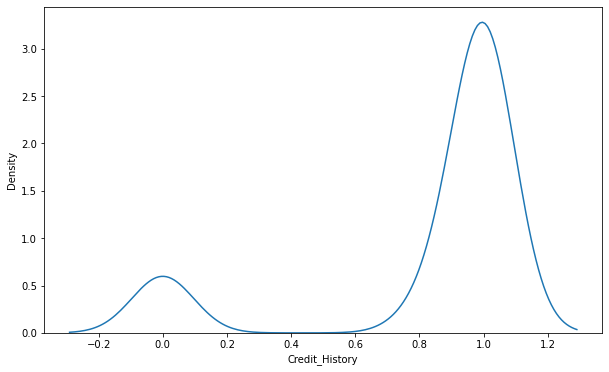

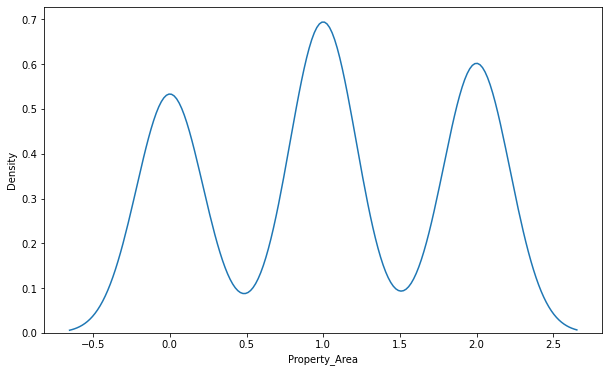

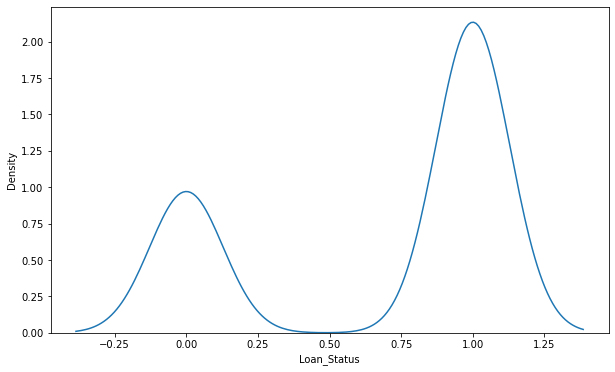

In [24]:
#kde plot to check distribution of data
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(df[i])

#### skewness and outlier removal

In [25]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

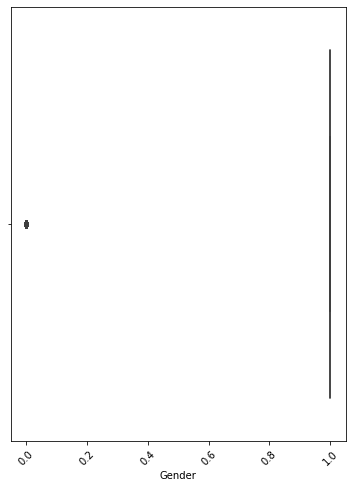

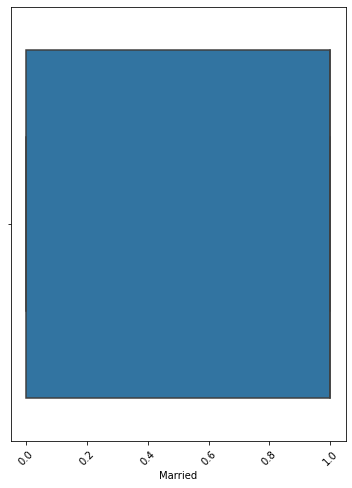

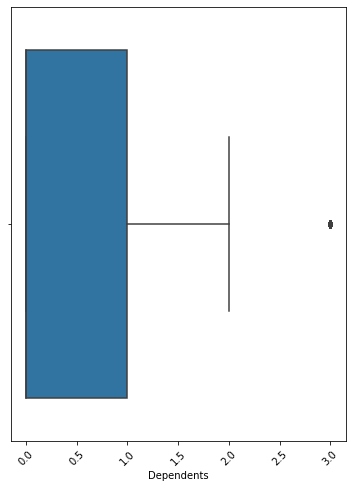

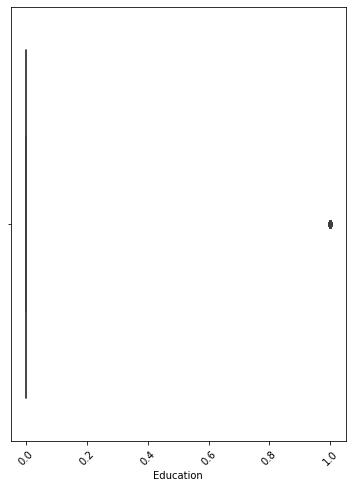

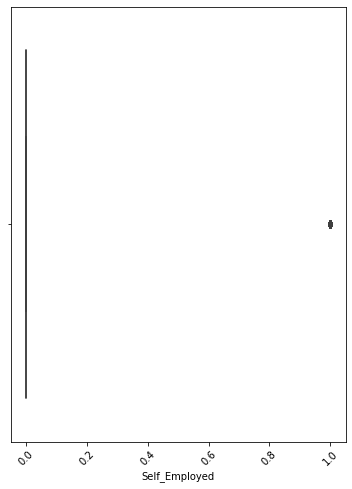

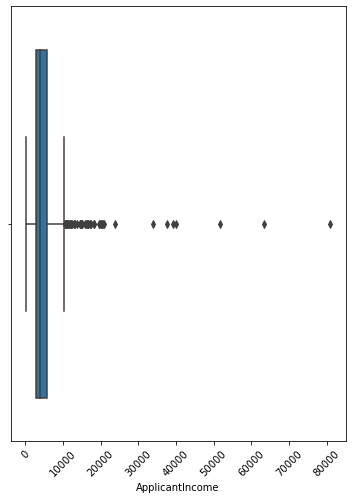

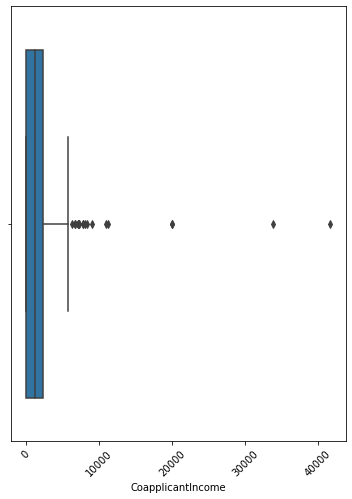

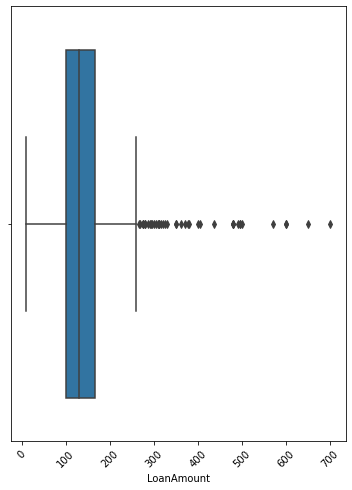

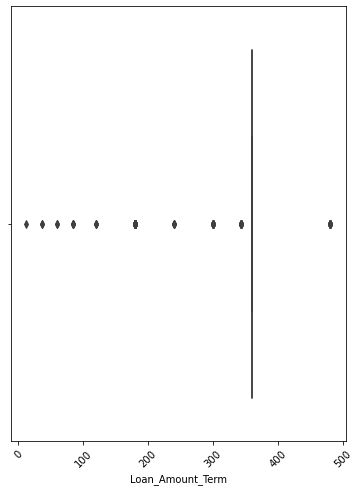

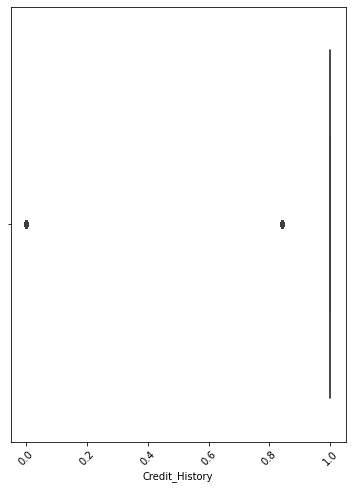

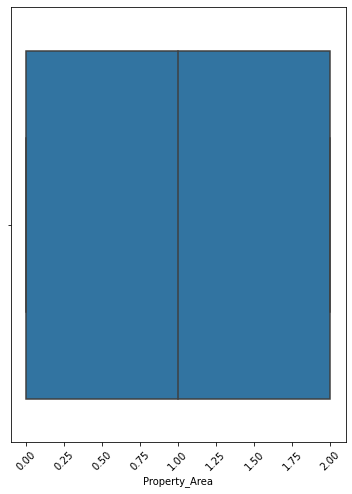

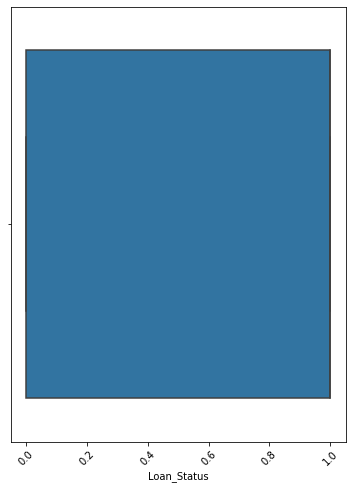

In [26]:
#checking the outliers
for column in df.columns:
    plt.figure(figsize=(6,8))
    sns.boxplot(x=df[column])
    plt.xticks(rotation=45)
    plt.show()

#### Removing outliers
Z Score_Technique

In [27]:
#import libray
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
z.shape

(614, 12)

In [28]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [29]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 12)
(577, 12)


### percentage data loss

In [30]:
loss_percent=(614-577)/614*100
print(loss_percent)

6.026058631921824


Removing outlier using z score is  14% data loss occurs

#### removing skewness

In [31]:
df1 = np.sqrt(df)

df1.head(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,76.478755,0.000000,12.100089,18.973666,1.0,1.414214,1.0
1,1.0,1.0,1.000000,0.0,0.0,67.697858,38.832976,11.313708,18.973666,1.0,0.000000,0.0
2,1.0,1.0,0.000000,0.0,1.0,54.772256,0.000000,8.124038,18.973666,1.0,1.414214,1.0
3,1.0,1.0,0.000000,1.0,0.0,50.823223,48.559242,10.954451,18.973666,1.0,1.414214,1.0
4,1.0,0.0,0.000000,0.0,0.0,77.459667,0.000000,11.874342,18.973666,1.0,1.414214,1.0
5,1.0,1.0,1.414214,0.0,1.0,73.600272,64.776539,16.340135,18.973666,1.0,1.414214,1.0
6,1.0,1.0,0.000000,1.0,0.0,48.301139,38.935845,9.746794,18.973666,1.0,1.414214,1.0
7,1.0,1.0,1.732051,0.0,0.0,55.099909,50.039984,12.569805,18.973666,0.0,1.000000,0.0
8,1.0,1.0,1.414214,0.0,0.0,63.292970,39.064050,12.961481,18.973666,1.0,1.414214,1.0
9,1.0,1.0,1.000000,0.0,0.0,113.318136,104.728220,18.681542,18.973666,1.0,1.000000,0.0


In [32]:
df1.skew()


Gender              -1.648795
Married             -0.644850
Dependents           0.567810
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.967286
CoapplicantIncome    0.979561
LoanAmount           1.314162
Loan_Amount_Term    -3.175195
Credit_History      -2.005377
Property_Area       -0.617610
Loan_Status         -0.809998
dtype: float64

In [33]:
df=df1

# 5.Feature Engineering

In [34]:
y = df['Loan_Status']
x = df.drop('Loan_Status', axis = 1)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

#### data imbalence

In [36]:
print(df['Loan_Status'].value_counts())

1.0    422
0.0    192
Name: Loan_Status, dtype: int64


In [37]:
from sklearn.utils import resample
X=pd.concat([x_train,y_train],axis=1)
label0=X[X.Loan_Status==0]
label1=X[X.Loan_Status==1]
label_unsampled=resample(label0,replace=True,n_samples=len(label1),random_state=27)
unsampled=pd.concat([label1,label_unsampled])
unsampled.Loan_Status.value_counts()

0.0    336
1.0    336
Name: Loan_Status, dtype: int64

In [38]:
x_train= unsampled.drop(columns='Loan_Status')
y_train= unsampled['Loan_Status']

### scaling

In [39]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [40]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

# 6.Model construction

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import mean_squared_error
from sklearn.metrics  import accuracy_score
from sklearn.metrics  import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


## RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
# creating the model
model_rfc=RandomForestClassifier(n_estimators=400)
# feeding the training set into the model
model_rfc.fit(x_train,y_train)
# predicting the results for the test set
y_pred=model_rfc.predict(x_test)
# calculating the training and testing accuracies
print('Training accuracy :',model_rfc.score(x_train,y_train))
print('testing accuracy :',model_rfc.score(x_test,y_test))
# classification report
print(classification_report(y_test,y_pred))
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))


Training accuracy : 1.0
testing accuracy : 0.7804878048780488
              precision    recall  f1-score   support

         0.0       0.71      0.46      0.56        37
         1.0       0.80      0.92      0.85        86

    accuracy                           0.78       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.77      0.78      0.76       123

[[17 20]
 [ 7 79]]
accuracy_score : 0.7804878048780488


#### cross validation score

In [43]:
from sklearn.model_selection import GridSearchCV, cross_val_score
rfc_cv=cross_val_score(model_rfc,x,y,scoring='accuracy', cv = 10).mean()
print('cv score :',rfc_cv)


cv score : 0.785193019566367


## SVC

In [44]:
from sklearn.svm import SVC
# creating the model
model_svc = SVC()
# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.7693452380952381
Testing accuracy : 0.7723577235772358
              precision    recall  f1-score   support

         0.0       0.67      0.49      0.56        37
         1.0       0.80      0.90      0.85        86

    accuracy                           0.77       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.76      0.77      0.76       123

[[18 19]
 [ 9 77]]
accuracy_score : 0.7723577235772358


#### cross validation score

In [45]:
from sklearn.model_selection import GridSearchCV, cross_val_score
svc_cv=cross_val_score(model_svc,x,y,scoring='accuracy', cv = 10).mean()
print('cv score :',svc_cv)


cv score : 0.6873083024854575


## DecisionTreeClassifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model_dt = DecisionTreeClassifier()

# feeding the training set into the model
model_dt.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_dt.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 1.0
Testing accuracy : 0.7642276422764228
              precision    recall  f1-score   support

         0.0       0.63      0.51      0.57        37
         1.0       0.81      0.87      0.84        86

    accuracy                           0.76       123
   macro avg       0.72      0.69      0.70       123
weighted avg       0.75      0.76      0.76       123

[[19 18]
 [11 75]]
accuracy_score : 0.7642276422764228


#### cross validation score

In [47]:
#Now lets try to do some evaluation for decision tree model using cross validation.

dt_cv = cross_val_score(estimator = model_dt, X = x_train, y = y_train, cv = 10)
dt_cv.mean()

0.8601624231782266

## GaussianNB

In [48]:
from sklearn.naive_bayes import GaussianNB
# creating model
model_gnb = GaussianNB()

# feeding the training set into the model
model_gnb.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_gnb.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_gnb.score(x_train, y_train))
print("Testing accuracy :", model_gnb.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.7202380952380952
Testing accuracy : 0.8130081300813008
              precision    recall  f1-score   support

         0.0       0.94      0.41      0.57        37
         1.0       0.79      0.99      0.88        86

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.72       123
weighted avg       0.84      0.81      0.79       123

[[15 22]
 [ 1 85]]
accuracy_score : 0.8130081300813008


#### cross validation score

In [49]:
#Now lets try to do some evaluation for GaussianNB model using cross validation.
gnb_cv = cross_val_score(estimator = model_gnb, X = x_train, y = y_train, cv = 10)
gnb_cv.mean()

0.7173617208077261

## KNeighborsClassifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
# creating model
model_KNc = KNeighborsClassifier(n_neighbors=7)

# feeding the training set into the model
model_KNc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_KNc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_KNc.score(x_train, y_train))
print("Testing accuracy :", model_KNc.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.8169642857142857
Testing accuracy : 0.7154471544715447
              precision    recall  f1-score   support

         0.0       0.53      0.54      0.53        37
         1.0       0.80      0.79      0.80        86

    accuracy                           0.72       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.72      0.72      0.72       123

[[20 17]
 [18 68]]
accuracy_score : 0.7154471544715447


#### cross validation score

In [51]:
knn_cv=cross_val_score(model_KNc,x,y,scoring='accuracy', cv = 10)
knn_cv.mean()

0.6530936012691697

## LogisticRegression

In [52]:
# creating the model
model_lg=LogisticRegression()
# feeding the training set into the model
model_lg.fit(x_train,y_train)
# predicting the results for the test set
y_pred=model_lg.predict(x_test)
# calculating the training and testing accuracies
print('Training accuracy :',model_lg.score(x_train,y_train))
print('testing accuracy :',model_lg.score(x_test,y_test))
# classification report
print(classification_report(y_test,y_pred))
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.7366071428571429
testing accuracy : 0.7642276422764228
              precision    recall  f1-score   support

         0.0       0.65      0.46      0.54        37
         1.0       0.79      0.90      0.84        86

    accuracy                           0.76       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.75      0.76      0.75       123

[[17 20]
 [ 9 77]]
accuracy_score : 0.7642276422764228


#### cross validation score

In [53]:
from sklearn.model_selection import GridSearchCV, cross_val_score
lg_cv=cross_val_score(model_lg,x,y,scoring='accuracy', cv = 3).mean()
print('cv score :',lg_cv)

cv score : 0.8062250916626814


In [54]:
print('MODEL',"             ",'Accurancy score','      ','C_V Score','     ','Difference')
print("LOGISTIC REGG    ",model_lg.score(x_test, y_test),"      ",round(lg_cv.mean(),2),"      ", round(model_lg.score(x_test, y_test)-lg_cv.mean(),3))
print("RANDOM FOREST    ",model_rfc.score(x_test, y_test),"      ",round(rfc_cv.mean(),2),"     ", round(model_rfc.score(x_test, y_test)-rfc_cv.mean(),3))
print("SVC              ",model_svc.score(x_test, y_test),"      ",round(svc_cv.mean(),2),"      ", round(model_svc.score(x_test, y_test)-svc_cv.mean(),3))
print("DTREE            ",model_rfc.score(x_test, y_test),"      ",round(dt_cv.mean(),2),"     ", round(model_dt.score(x_test, y_test)-dt_cv.mean(),3))
print('KNeighborsclass  ',model_KNc.score(x_test, y_test),"      ",round(knn_cv.mean(),2),"      ",round(model_KNc.score(x_test, y_test)-knn_cv.mean(),3)) 
print('GaussianNB',"      ",model_gnb.score(x_test, y_test),"      ",round(gnb_cv.mean(),2),"     ",round(model_gnb.score(x_test, y_test)-gnb_cv.mean(),3)) 

MODEL               Accurancy score        C_V Score       Difference
LOGISTIC REGG     0.7642276422764228        0.81        -0.042
RANDOM FOREST     0.7804878048780488        0.79       -0.005
SVC               0.7723577235772358        0.69        0.085
DTREE             0.7804878048780488        0.86       -0.096
KNeighborsclass   0.7154471544715447        0.65        0.062
GaussianNB        0.8130081300813008        0.72       0.096


The best model accoding to accuracy score- cross validation score is LOGISTIC REGRESSION,RandomForestClassifier,GaussianNB since it is having least difference

# 7.Hyper parameter tuning

### FINDING BEST random_state

In [55]:
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lg=LogisticRegression(fit_intercept=True)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    print('accurancy',acc, 'random_state',i)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
    print('accurancy',maxAcc, 'random_state',i)

print('Best accurancy is ',maxAcc, ' on random_state',maxRs)   

accurancy 0.1611146029750682 random_state 0
accurancy 0.1611146029750682 random_state 0
accurancy 0.042176870748299455 random_state 1
accurancy 0.1611146029750682 random_state 1
accurancy -0.05539691604797259 random_state 2
accurancy 0.1611146029750682 random_state 2
accurancy 0.11294765840220389 random_state 3
accurancy 0.1611146029750682 random_state 3
accurancy 0.050625817298711295 random_state 4
accurancy 0.1611146029750682 random_state 4
accurancy 0.10104669887278572 random_state 5
accurancy 0.1611146029750682 random_state 5
accurancy 0.13204508856682762 random_state 6
accurancy 0.1611146029750682 random_state 6
accurancy 0.18278301886792458 random_state 7
accurancy 0.18278301886792458 random_state 7
accurancy 0.30000000000000004 random_state 8
accurancy 0.30000000000000004 random_state 8
accurancy 0.09118598895869023 random_state 9
accurancy 0.30000000000000004 random_state 9
accurancy 0.036045758687675344 random_state 10
accurancy 0.30000000000000004 random_state 10
accurancy 0.

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=63)

### 1. LogisticRegression

In [57]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(x, y)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.8078368652538984


In [58]:
# creating the model
model = LogisticRegression(C= 0.4393970560760795)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_lg.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.790224032586558
Testing accuracy : 0.8780487804878049
              precision    recall  f1-score   support

         0.0       0.33      0.46      0.38        35
         1.0       0.74      0.62      0.68        88

    accuracy                           0.58       123
   macro avg       0.53      0.54      0.53       123
weighted avg       0.62      0.58      0.59       123

[[16 19]
 [33 55]]


#### cross validation score

In [59]:
lg_cv=cross_val_score(model,x,y,scoring='accuracy', cv = 3).mean()
lg_cv

0.807851107922844

### 2.RandomForestClassifier

In [60]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}

In [61]:
rf=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)
rf.fit(x_train,y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 1000, 50],
                         'random_state': [10]},
             scoring='accuracy', verbose=2)

In [62]:
rf.best_params_

{'criterion': 'entropy',
 'min_samples_split': 4,
 'n_estimators': 200,
 'random_state': 10}

In [63]:
clf= RandomForestClassifier(criterion='entropy',min_samples_split=2,n_estimators=200,random_state=10).fit(x_train, y_train)
fianlRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,fianlRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, fianlRFC))
print(randomforest_accu)

              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70        35
         1.0       0.85      0.98      0.91        88

    accuracy                           0.86       123
   macro avg       0.88      0.77      0.81       123
weighted avg       0.87      0.86      0.85       123

0.8617886178861789


In [64]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.7866411605292524

# 3.GaussianNB

In [65]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [66]:
gs_NB.best_params_

{'var_smoothing': 3.511191734215127e-05}

In [67]:
from sklearn.naive_bayes import GaussianNB
final_mod = GaussianNB(var_smoothing =3.511191734215127e-05 )

final_mod.fit(x_train,y_train)

predGNB = final_mod.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acu=accuracy_score(y_test,predGNB)
print(gnb_acu)
crGNB

0.8617886178861789


,precision,recall,f1-score,support
0.0,0.909091,0.571429,0.701754,35.000000
1.0,0.851485,0.977273,0.910053,88.000000
accuracy,0.861789,0.861789,0.861789,0.861789
macro avg,0.880288,0.774351,0.805904,123.000000
weighted avg,0.867877,0.861789,0.850781,123.000000


In [68]:
print(gnb_acu*100)

86.1788617886179


In [69]:
#Now lets try to do some evaluation for GaussianNB model using cross validation.
gnb_cv = cross_val_score(estimator = final_mod, X = x_train, y = y_train, cv = 10)
gnb_cv.mean()

0.7821632653061225

### The best model is RandomForestClassifier() with 86% accuracy

# 8. Evaluation

### AUC ROC CURVE

In [70]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


model1 = RandomForestClassifier()


# fit model
model1.fit(x_train, y_train)


# predict probabilities
pred_prob1 = model1.predict_proba(x_test)

In [71]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [72]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


print(auc_score1)

0.8712662337662338


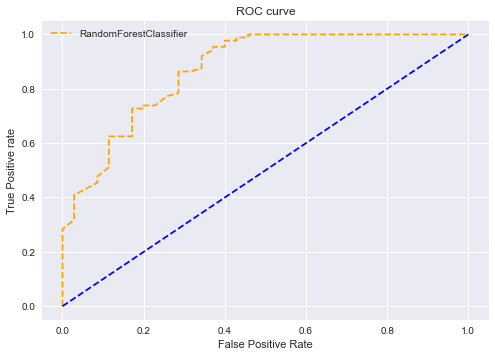

In [73]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# 9.Saving the model

In [74]:
import joblib
joblib.dump(model,"final model.pkl")

['final model.pkl']